# Contexto do Desafio
A House Rocket é uma plataforma digital que tem como modelo de negócio, a compra e a venda de imóveis usando tecnologia.

Você é um Data Scientist contratado pela empresa para ajudar a encontrar as melhores oportunidades de negócio no mercado de imóveis. O CEO da House Rocket gostaria de maximizar a receita da empresa encontrando boas oportunidades de negócio.

Sua principal estratégia é comprar boas casas em ótimas localizações com preços baixos e depois revendê-las posteriormente à preços mais altos. Quanto maior a diferença entre a compra e a venda, maior o lucro da empresa e portanto maior sua receita.

Entretanto, as casas possuem muitos atributos que as tornam mais ou menos atrativas aos compradores e vendedores e a localização e o período do ano também podem influenciar os preços.

Portanto, seu trabalho como Data Scientist é responder as seguinte perguntas:

* Quais casas o CEO da House Rocket deveria comprar e por qual preço de compra?

* Uma vez a casa em posse da empresa, qual o melhor momento para vendê-las e qual seria o preço da venda?

* A House Rocket deveria fazer uma reforma para aumentar o preço da venda? Quais seriam as sugestões de mudanças? Qual o incremento no preço dado por cada opção de reforma?

link: https://sejaumdatascientist.com/os-5-projetos-de-data-science-que-fara-o-recrutador-olhar-para-voce/

### Descrição das variáveis

* date: data de venda 
* price: preço de venda
* bedrooms: número de quartos
* bathrooms: número de banheiros
* sqft_living: tamanho da área habitacional em pés²
* sqft_lot: tamanho do lote em pés²
* floors: número de andares
* waterfront: ‘1’ se a propriedade for à beira-mar, ‘0’ se não.
* view: um índice de 0 a 4 do quão bom é a visão da propriedade (imagine 0 para uma propriedade com visão para um beco sujo e 4 para uma propriedade com visão para um lindo parque)
* condition: condição da casa, com valores de 1 até 5
* grade: classificação pela qualidade do material da casa. Construções com melhores materiais normalmente custam mais caro
* sqft_above: pés² acima do solo
* sqft_basement: pés² abaixo do solo
* yr_built: ano de construção
* yr_renovated: ano de renovação. ‘0’ se nunca foi renovada
* zipcode: código zip de 5 dígitos
* lat, long: latitude e longitude
* squft_livng15: tamanho médio das 15 casas mais próximas, em pés²
* sqft_lot15: tamanho médio dos lotes das 15 casas mais próximas, em pés²

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [20]:
houses_dataset = pd.read_csv('kc_house_data.csv')

In [21]:
#21613 linhas e 21 colunas
houses_dataset.shape

(21613, 21)

In [8]:
pd.options.display.max_columns = None #usamos para o notebook mostrar todas as colunas do dataset 
houses_dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [22]:
#Checando a tipagem das variáveis do dataset
#Podemos reduzir o uso da memória modificando a tipagem das colunas de float64 e int64 para float32 e int32 
houses_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [23]:
#Dropando variáveis que não serão utilizadas na análise
houses_dataset.drop(['id','date','zipcode','lat','long'],axis=1,inplace=True)

#Criando uma lista do nomes da colunas com int64 e float64
int64 = list(houses_dataset.select_dtypes(['int64']).columns)
float64 = list(houses_dataset.select_dtypes(['float64']).columns)

#Convertendo e sobreescrevendo as colunas com a nova tipagem
houses_dataset[int64] = houses_dataset[int64].astype('int32')
houses_dataset[float64] = houses_dataset[float64].astype('float32')

In [24]:
houses_dataset.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503


In [25]:
#Vamos substituir a variável yr_renovated (mostra o ano que a casa foi reformada) por um variável que aponta
#se a casa foi ou não reformada
houses_dataset['renovated'] = list(map(lambda x:1 if x!=0 else 0,houses_dataset['yr_renovated']))

#Em seguida vamos eliminar a coluna yr_renovated
houses_dataset.drop(['yr_renovated'],axis=1,inplace=True)

#### Correção de erros do dataset

#### Primeiramente vamos ver se existem valores NaN e erros no dataset. Vamos considerar casas com 0 banheiros e 0 quartos erros no dataset. Assim sendo, serão removidos da base

In [26]:
#Existem algum campo com valor NaN?
houses_dataset.isna().count()

price            21613
bedrooms         21613
bathrooms        21613
sqft_living      21613
sqft_lot         21613
floors           21613
waterfront       21613
view             21613
condition        21613
grade            21613
sqft_above       21613
sqft_basement    21613
yr_built         21613
sqft_living15    21613
sqft_lot15       21613
renovated        21613
dtype: int64

In [27]:
#Existem casas com 0 quartos e zero banheiros?
houses_dataset.query('bedrooms == 0 & bathrooms == 0')

#Vamos considerar erro de digitação, casas com 0 quartos e 0 banheiros

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,renovated
875,1095000.0,0,0.0,3064,4764,3.5,0,2,3,7,3064,0,1990,2360,4000,0
3119,380000.0,0,0.0,1470,979,3.0,0,2,3,8,1470,0,2006,1470,1399,0
6994,1295650.0,0,0.0,4810,28008,2.0,0,0,3,12,4810,0,1990,4740,35061,0
9773,355000.0,0,0.0,2460,8049,2.0,0,0,3,8,2460,0,1990,2520,8050,0
9854,235000.0,0,0.0,1470,4800,2.0,0,0,3,7,1470,0,1996,1060,7200,0
14423,139950.0,0,0.0,844,4269,1.0,0,0,4,7,844,0,1913,1380,9600,0
19452,142000.0,0,0.0,290,20875,1.0,0,0,1,1,290,0,1963,1620,22850,0


In [28]:
houses_dataset.drop(houses_dataset.query('bedrooms == 0 & bathrooms == 0').index,inplace=True)

In [29]:
#Drop realizado com sucesso
houses_dataset.query('bedrooms == 0 & bathrooms == 0')

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,renovated


### Análise exploratória dos dados

#### Observando a coluna bathrooms, notamos algo estranho: 
Como uma casa por possuir 2.50 banheiros?
Após uma pesquisa, descobri no kaggle, a explicação para o número de banheiros estar em float, escrita pelo próprio autor do dataset (disponível em: https://www.kaggle.com/harlfoxem/housesalesprediction/discussion/24804)


>harlfoxem - Dataset Creator • 4 years ago

>from wiki:

>In the United States, bathrooms are generally categorized as master bathroom, containing a varied shower [2] and a tub that is adjoining to a master bedroom, a "full bathroom" (or "full bath"), containing four plumbing fixtures: bathtub/shower, or (separate shower), toilet, and sink; "half (1/2) bath" (or "powder room") containing just a toilet and sink; and "3/4 bath" containing toilet, sink, and shower, although the terms vary from market to market. In some U.S. markets, a toilet, sink, and shower are considered a "full bath". This lack of a single, universal definition commonly results in discrepancies between advertised and actual number of baths in real estate listings. An additional complication is that there are currently two ways of notating the number of bathrooms in a dwelling. One method is to count a half bathroom as ".5" and then add this to the number of full bathrooms (e.g., "2.5" baths would mean 2 full baths and 1 half bath). The other, newer method is to put the number of full bathrooms to the left side of the decimal point and to put the number of half bathrooms to the right of the decimal point (e.g., "2.1" would mean 2 full baths and 1 half bath; "3.2" would mean 3 full baths and 2 half baths).

>In summary, just a big mess :)

#### Para essa análise, vamos arredondar o número de banheiros para cima, passando o valor de float, para int. Dessa forma, casas que tinham 2.5 banheiros, terão 3, por exemplo


In [30]:
import math
houses_dataset['bathrooms'] = list(map(lambda x: math.ceil(x), houses_dataset['bathrooms']))

In [73]:
houses_dataset['bathrooms'].value_counts()
#Agora os valores estao em números inteiros

3    9365
2    6433
1    3928
4    1611
5     223
6      33
7       6
8       4
0       3
Name: bathrooms, dtype: int64

#### Olhando a distribuição dos preços das casas (variável target)

In [35]:
def plota_histograma_boxplot(dataframe,coluna): 
    fig, (freq_graph, boxplot_graph) = plt.subplots(1, 2, figsize=(18, 8))

    # Gráfico da distribuição de frequências
    sns.distplot(dataframe[coluna], ax=freq_graph, )
    freq_graph.set_title(f"Distribuição de - {coluna}", fontsize=22)
    freq_graph.grid(True)

    # Box Plot da variável
    boxplot_graph = sns.boxplot(y=dataframe[coluna], width=0.3)
    boxplot_graph.set_title(f"Boxplot de - {coluna}", fontsize=22)
    boxplot_graph.grid(True)

    plt.show()

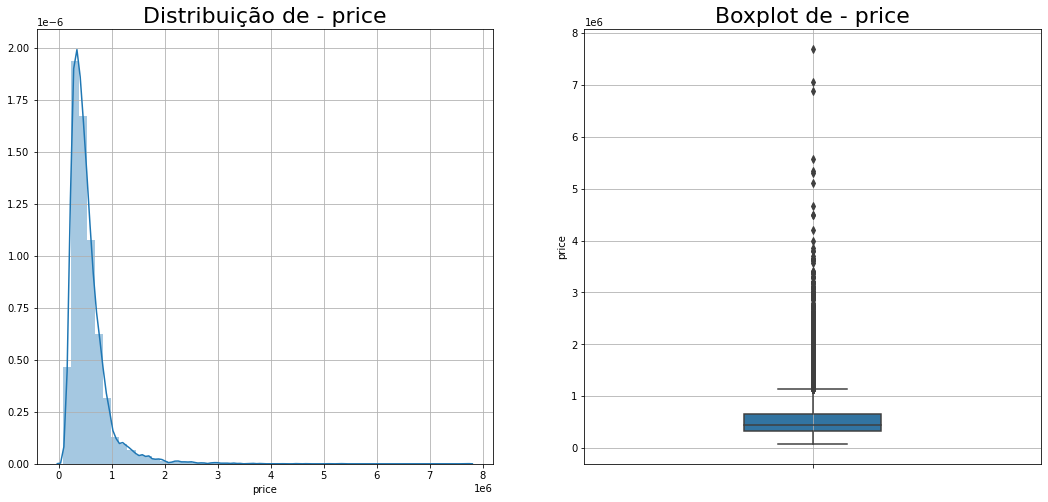

In [36]:
plota_histograma_boxplot(houses_dataset,'price')

#### Podemos ver que temos muitos outliers. A distribuição tem uma forte assimetria a direita


#### Quantos outliers temos no dataset? Quais são os valores?

In [37]:
def veroutlier(dataset,coluna):
    lista = dataset[coluna]
    Q1 = dataset[coluna].quantile(0.25)
    Q3 = dataset[coluna].quantile(0.75)
    IQR = Q3 - Q1
    contacima = 0
    contabaixo = 0
    listaacima = []
    listaabaixo = []
    
    for x in lista:
        if x < (Q1 - (1.5*IQR)):
            contabaixo = contabaixo + 1
            listaabaixo.append(x)
        if x > (Q3 + (1.5*IQR)):
            contacima = contacima + 1
            listaacima.append(x)
    return print(f"Outliers acima: {contacima} / valor: {listaacima}\nOutliers abaixo: {contabaixo} / valor: {listaabaixo}")

In [39]:
veroutlier(houses_dataset,'price')
#Temos 1145 valores outliers acima e 0 abaixo

Outliers acima: 1145 / valor: [1225000.0, 2000000.0, 1350000.0, 1325000.0, 1450000.0, 2250000.0, 1505000.0, 2400000.0, 2900000.0, 1365000.0, 2050000.0, 3075000.0, 2384000.0, 1384000.0, 1400000.0, 1350000.0, 1550000.0, 1300000.0, 1450000.0, 1199000.0, 1150000.0, 1385000.0, 1280000.0, 1197350.0, 1485000.0, 2250000.0, 1600000.0, 2125000.0, 1450000.0, 1950000.0, 1220000.0, 3070000.0, 1250000.0, 1145000.0, 1484900.0, 1578000.0, 1300000.0, 1310000.0, 2250000.0, 1355000.0, 1216000.0, 2400000.0, 1270000.0, 1200000.0, 1321500.0, 2450000.0, 1242500.0, 1570000.0, 1200000.0, 1278000.0, 1955000.0, 1750000.0, 5110800.0, 1150000.0, 1875000.0, 1225000.0, 2300000.0, 2260000.0, 5300000.0, 1200000.0, 2200000.0, 1131000.0, 1175000.0, 1700000.0, 1400000.0, 2537000.0, 1355000.0, 1229000.0, 5350000.0, 1328000.0, 1218000.0, 1250000.0, 1300000.0, 1175000.0, 1375000.0, 1150000.0, 1198000.0, 2250000.0, 1230000.0, 1265000.0, 1679000.0, 1928000.0, 1175000.0, 2350000.0, 1135000.0, 1315000.0, 1430000.0, 1525000.0, 1

In [41]:
def plotabarras(dataset, coluna, mostra_percentual='não'):
    sns.set_style("whitegrid")
    lista = dataset[coluna].value_counts().head(10)
    plt.figure(figsize = (15,5))
    sns.barplot(data = lista, x=lista.index , y=lista.values,order = lista
            , palette = sns.color_palette("Blues_r", n_colors=len(lista)+4)).set_xticklabels(lista.index, rotation = 45)
    for index,data in enumerate(lista):
        plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=13))
    plt.show()
    if mostra_percentual == 'sim':
        print("Percentual de cada categoria no valor total")
        print(round(dataset[coluna].value_counts(normalize=True).head(10)*100,2))
        print("______________________")
        print("Número de categorias na coluna")
        print(dataset[coluna].nunique())

In [47]:
houses_dataset['yr_built'].max()
houses_dataset['yr_built'].min()

# A casa mais recente foi construida em 2015 e a mais antiga em 1900

1900

#### Em quais anos foram construídas mais casas?

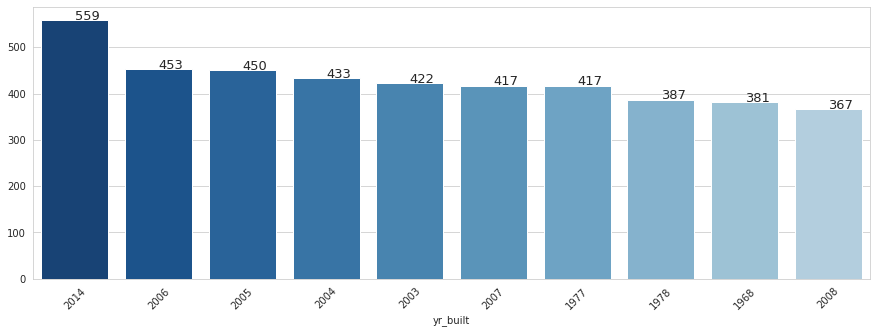

Percentual de cada categoria no valor total
2014    2.59
2006    2.10
2005    2.08
2004    2.00
2003    1.95
2007    1.93
1977    1.93
1978    1.79
1968    1.76
2008    1.70
Name: yr_built, dtype: float64
______________________
Número de categorias na coluna
116


In [43]:
plotabarras(houses_dataset,'yr_built','sim')

#### Qual a distribuição casas/quartos do dataset?

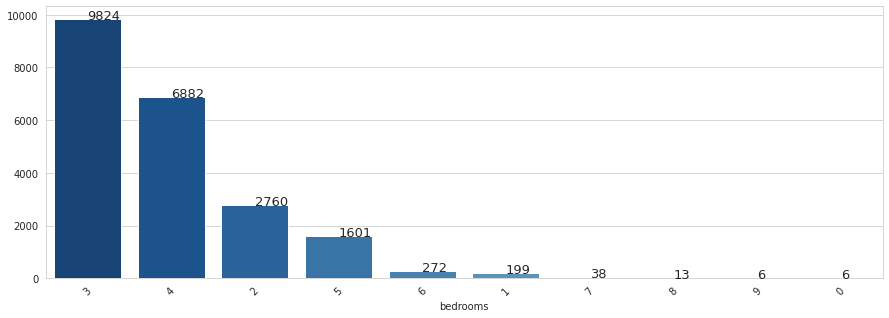

Percentual de cada categoria no valor total
3    45.47
4    31.85
2    12.77
5     7.41
6     1.26
1     0.92
7     0.18
8     0.06
9     0.03
0     0.03
Name: bedrooms, dtype: float64
______________________
Número de categorias na coluna
13


In [48]:
plotabarras(houses_dataset,'bedrooms','sim')

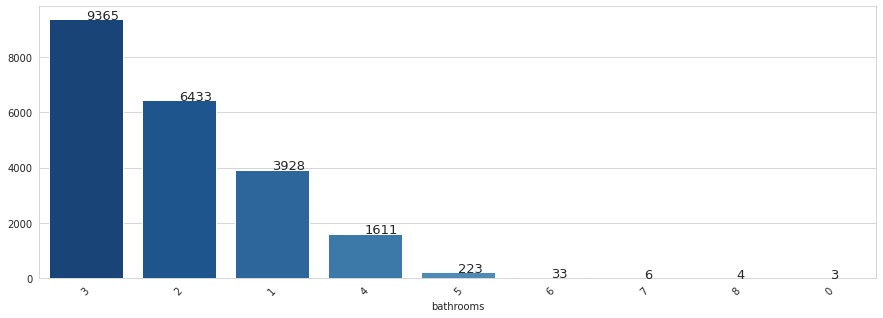

Percentual de cada categoria no valor total
3    43.34
2    29.77
1    18.18
4     7.46
5     1.03
6     0.15
7     0.03
8     0.02
0     0.01
Name: bathrooms, dtype: float64
______________________
Número de categorias na coluna
9


In [49]:
plotabarras(houses_dataset,'bathrooms','sim')

#### Qual as condições das casas?

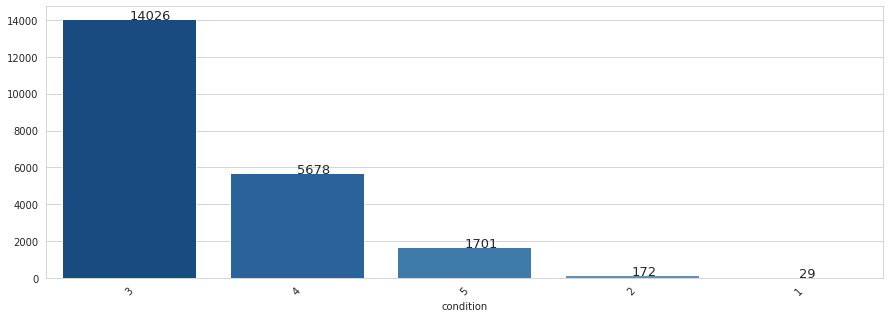

Percentual de cada categoria no valor total
3    64.92
4    26.28
5     7.87
2     0.80
1     0.13
Name: condition, dtype: float64
______________________
Número de categorias na coluna
5


In [50]:
plotabarras(houses_dataset,'condition','sim')

#### Quais as qualidades dos materiais usados nas casas?

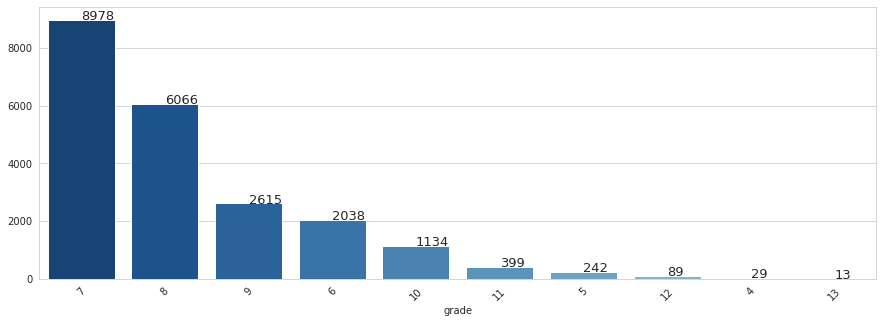

Percentual de cada categoria no valor total
7     41.55
8     28.08
9     12.10
6      9.43
10     5.25
11     1.85
5      1.12
12     0.41
4      0.13
13     0.06
Name: grade, dtype: float64
______________________
Número de categorias na coluna
11


In [52]:
plotabarras(houses_dataset,'grade','sim')

#### Existem mais casas reformadas ou não reformadas?

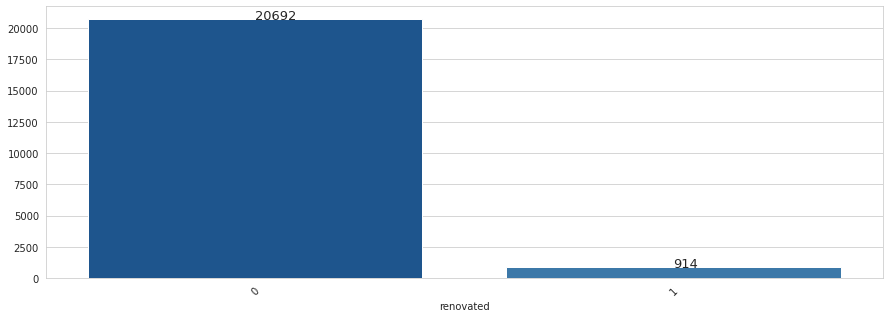

Percentual de cada categoria no valor total
0    95.77
1     4.23
Name: renovated, dtype: float64
______________________
Número de categorias na coluna
2


In [53]:
plotabarras(houses_dataset,'renovated','sim')

### Correlação entre variáveis

#### Vamos ver a correlação de todas as variáveis com a variável price

In [61]:
houses_dataset.corr()[["price"]].sort_values(by ="price", ascending=False)

,price
price,1.000000
sqft_living,0.701915
grade,0.667679
sqft_above,0.605398
sqft_living15,0.585251
bathrooms,0.492488
view,0.397352
sqft_basement,0.323902
bedrooms,0.309016
waterfront,0.266430


#### Encontramos um correlação forte com as variáveis
* sqft_living = tamanho da área habitada
* grade =  classificação pela qualidade do material da casa
* sqft_above = tamanho(pés) acima do solo
* sqft_living15 = tamanho das casas próximas
* bathrooms = banheiros

#### Encontramos um correlação fraca com as variáveis
* condition = condição da casa
* yr_built = ano que a casa foi contruída
* sqft_lot15 = tamanho médio dos lotes das 15 casas mais próximas, em pés²
* sqft_lot = tamanho do lote, em pés


#### Mesmo que não tenha sido encontrada um correlação muito forte com o número de quartos, vamos considera-la na análise

#### Casas reformadas tem um preço mediano mais alto que as não reformadas? (Usaremos mediana por causa dos outliers)

In [100]:
def plota_categorica(feature,target,dataframe, title=None, ax_rotation=0):  
    # Criando os dois eixos onde plotaremos nossos gráficos
    fig, (graph_boxplot, graph_pointplot) = plt.subplots(1, 2, figsize=(18, 8))
    
    # Configuração o Boxplot
    sns.boxplot(x=feature.name, y=target, data=dataframe, ax=graph_boxplot)
    graph_boxplot.set_title(title, fontsize=20)
    #graph_boxplot.set_xticklabels(labels=labels, fontsize=12, rotation=ax_rotation)
    graph_boxplot.grid(True)

    # Configuração do Pointplot
    from numpy import median
    sns.pointplot(x=feature.name, y=target, data=dataframe, ax=graph_pointplot,estimator=median)
    graph_pointplot.set_title("Mediana por "+title, fontsize=20)
    #graph_pointplot.set_xticklabels(labels=labels, fontsize=12, rotation=ax_rotation)
    graph_pointplot.grid(True)

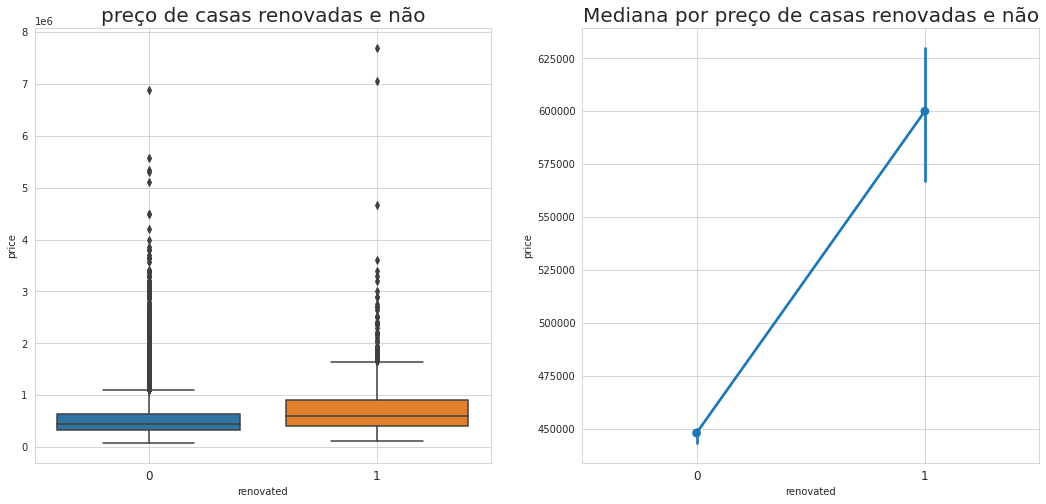

In [81]:
labels = [0,1]
plota_categorica(houses_dataset['renovated'],houses_dataset['price'],houses_dataset,labels, 'preço de casas renovadas e não')

#### Qual a diferença de valor ?

In [83]:
def pct_change(first, second):
    diff = second - first
    change = 0
    try:
        if diff > 0:
            change = (diff / first) * 100
        elif diff < 0:
            diff = first - second
            change = -((diff / first) * 100)
    except ZeroDivisionError:
        return round(float('inf'))
    return round(change)

In [85]:
renovated_median = houses_dataset.groupby(['renovated']).median()['price'].apply(float)
pct_change(renovated_median[0],renovated_median[1])

34.0

### Casas que já foram reformadas tem valores 34% superiores as que não foram

#### Existe uma relação entre o aumento do preço e a qualidade dos materiais?

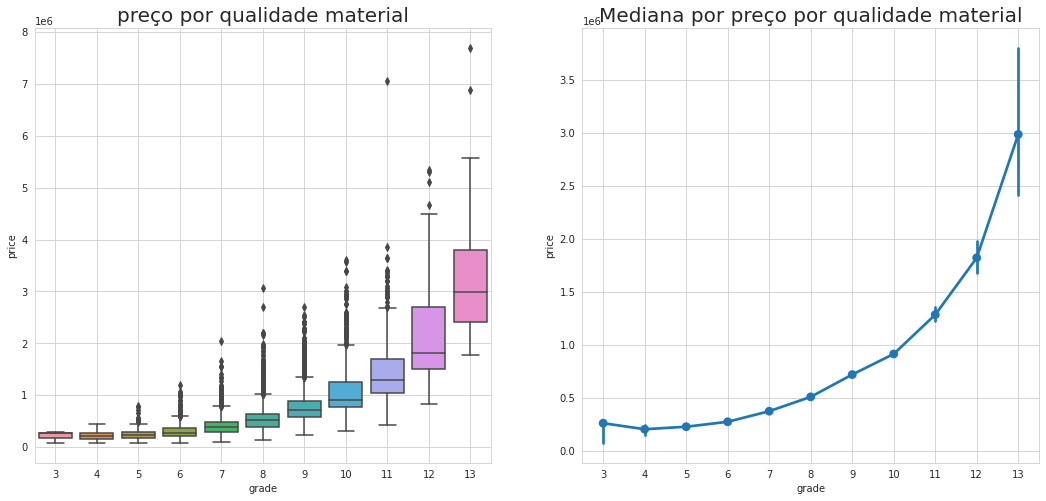

In [103]:
plota_categorica(houses_dataset['grade'],houses_dataset['price'],houses_dataset, 'preço por qualidade material')

#### Podemos ver que o preço mediano cresce de acordo com o aumento da qualidade dos materiais.

#### Aumento de preço com o aumento do número de banheiros

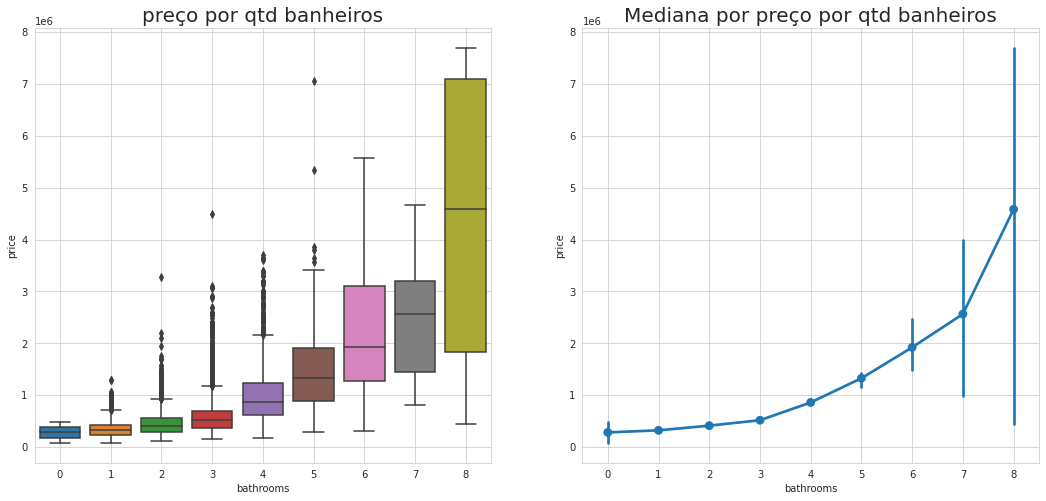

In [108]:
plota_categorica(houses_dataset['bathrooms'],houses_dataset['price'],houses_dataset, 'preço por qtd banheiros')

#### Aumento de preço com o aumento do número de quartos

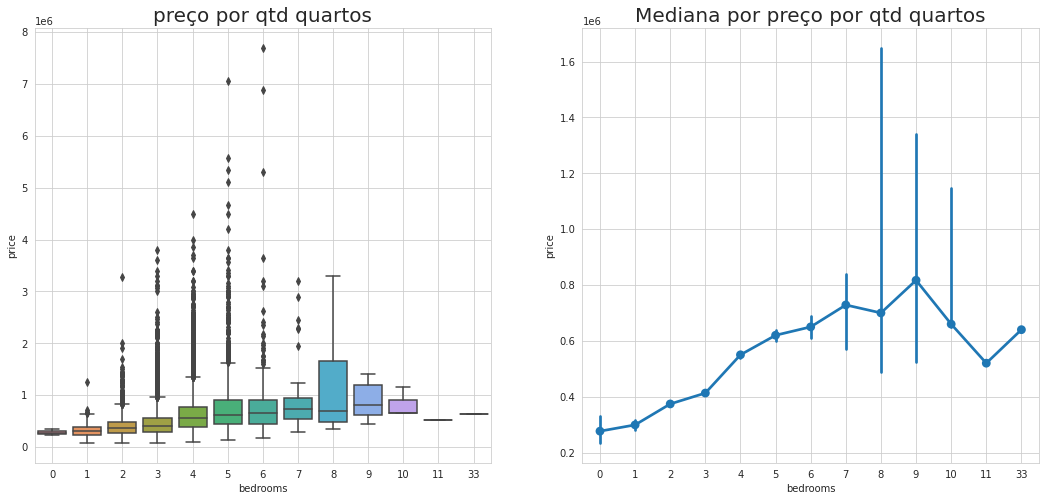

In [110]:
plota_categorica(houses_dataset['bedrooms'],houses_dataset['price'],houses_dataset, 'preço por qtd quartos')

#### Podemos ver que o preço aumenta quando se aumenta a quantidade de banheiros, não acontecendo da mesma forma com o aumento do número de quartos 

#### Para visualizarmos melhor a diferença de valor com o aumento da variavel grade, vamos agrupa-la em 5 categorias
- 3,4,5 - 1 (baixa)
- 6,7,8 - 2 (media)
- 9,10,11 - 3 (alta)
- 12,13 - 4 (muito alta)


In [138]:
houses_dataset['cat_grade'] = list(map(lambda x: 1 if x<=5 else 
                                       (2 if x>=6 and x<=8 else (3 if x>=9 and x<=11 
                                                                      else (4 if x>=12 else 'ccc'))) ,houses_dataset['grade']))

In [139]:
houses_dataset.groupby(['cat_grade']).median()['price']

cat_grade
1     226225.0
2     405000.0
3     803050.0
4    1930000.0
Name: price, dtype: float32

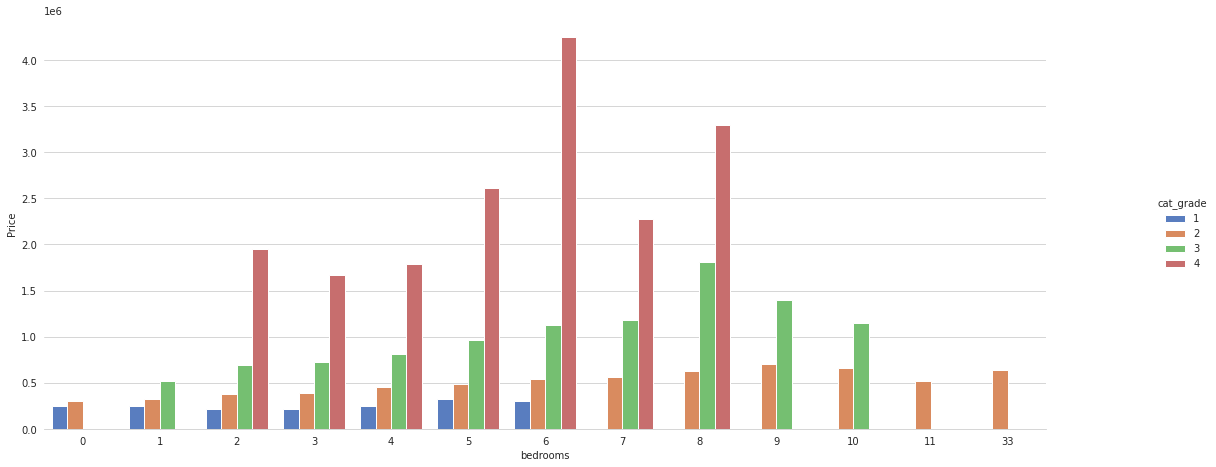

In [164]:
df_percent_price_bedroom = pd.DataFrame(houses_dataset.groupby(['bedrooms','cat_grade']).median()['price'].apply(int))
df_percent_price_bedroom.reset_index(inplace=True)

df_percent_price_bedroom['percentual'] = round(df_percent_price_bedroom5.groupby('bedrooms')['price'].pct_change(),2) * 100
df_percent_price_bedroom['dif_valor'] = df_percent_price_bedroom5["price"].diff(1)
df_percent_price_bedroom.fillna(0,inplace=True)


lista = df_percent_price_bedroom['percentual'].values

g = sns.catplot(x="bedrooms", y="price", hue="cat_grade", data=df_percent_price_bedroom,
                height=6, kind="bar", palette="muted")       
g.despine(left=True)
g.set_ylabels("Price")      
g.fig.set_figwidth(18.27)
g.fig.set_figheight(6.7)

plt.show()

#### Podemos ver no gráfico a diferença dos preços medianos da categoria 4 (muito alta) para as demais categorias. Diante disso, já podemos afirmar que a reformar casas usando materiais da melhor qualidade reflete em uma boa valorização dos imóveis.  A maior valorização ocorre nas casas de 6 quartos, seguida pela de 2 quartos

In [195]:
df_percent_price_bedroom.sort_values('percentual',ascending=False)

,bedrooms,cat_grade,price,percentual,dif_valor
24,6,4,4250000,278.0,3125000.0
29,8,3,1810000,188.0,1182500.0
8,2,4,1948500,179.0,1251000.0
20,5,4,2614500,172.0,1654500.0
12,3,4,1668250,130.0,942250.0
16,4,4,1782500,121.0,974500.0
26,7,3,1185000,113.0,627500.0
23,6,3,1125000,106.0,580000.0
32,9,3,1400000,100.0,700000.0
19,5,3,960000,96.0,470010.0


#### Agora vamos analisar os valores com base na quantidade de banheiros em cada casa

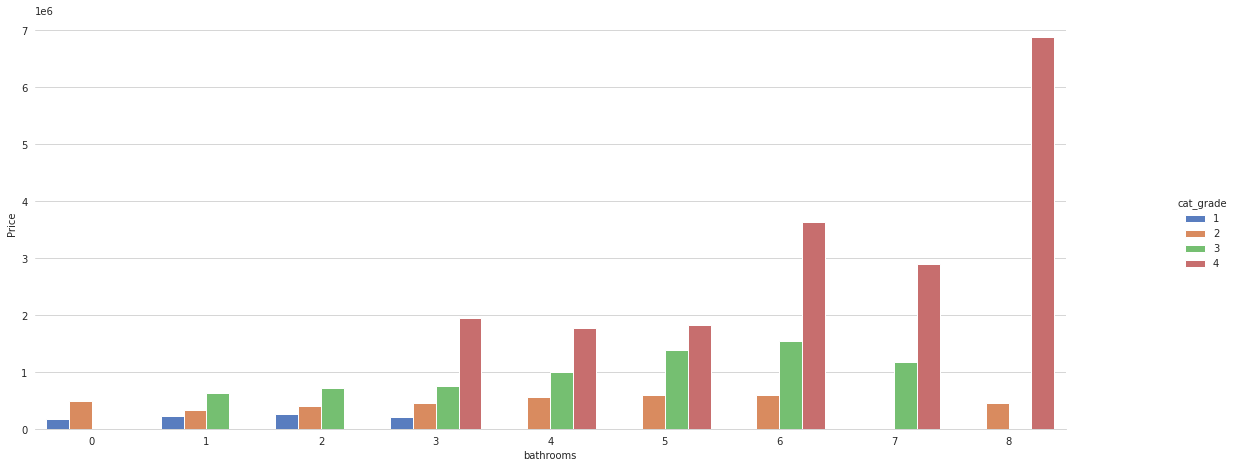

In [171]:
#Criando um novo dataset para mostrar numeros de quartos / tipos de material / media do preço
#Como temos 1145 outliers na base, usaremos a mediana.
df_percent_price_bathroom = pd.DataFrame(houses_dataset.groupby(['bathrooms','cat_grade']).median()['price'].apply(int))
df_percent_price_bathroom.reset_index(inplace=True)

df_percent_price_bathroom['percentual'] = round(df_percent_price_bathroom.groupby('bathrooms')['price'].pct_change(),2) * 100
df_percent_price_bathroom['dif_valor'] = df_percent_price_bathroom["price"].diff(1)
df_percent_price_bathroom.fillna(0,inplace=True)


g = sns.catplot(x="bathrooms", y="price", hue="cat_grade", data=df_percent_price_bathroom,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("Price")
g.fig.set_figwidth(18.27)
g.fig.set_figheight(6.7)

In [203]:
df_percent_price_bathroom.sort_values('percentual',ascending=False)

,index,bathrooms,cat_grade,price,percentual,dif_valor
24,24,8,4,6885000,1430.0,6435000.0
1,1,0,2,484000,173.0,306500.0
19,19,6,3,1550000,162.0,958250.0
11,11,3,4,1944500,162.0,1201150.0
22,22,7,4,2888000,145.0,1708000.0
16,16,5,3,1393500,136.0,802250.0
20,20,6,4,3635000,135.0,2085000.0
9,9,3,2,445000,109.0,232525.0
4,4,1,3,625000,92.0,300000.0
7,7,2,3,720000,79.0,317250.0


#### As maiores valorizações aconteceram nas casas com 6 e 3 banheiros. No gráfico podemos observar maiores valorização com 8 e 0 banheiros, mas vamos desconsiderar porque temos poucas ocorrencias destes tipos no dataset (4 e 3 casos, respoctivamente)

#### Vamos analisar outra variável com forte correlação: sqft_living

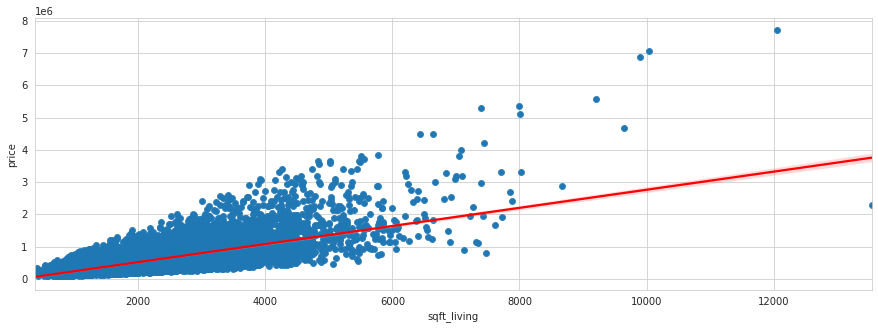

In [209]:
plota_scatter('sqft_living','price',houses_dataset) 

#### Podemos ver uma grande dispersão dos dados após os valores de 6000

In [237]:
houses_dataset.query('bedrooms==6 and bathrooms==3 and sqft_living<=6000 and grade<9')

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,renovated,cat_grade
209,464000.0,6,3,2300,3404,2.0,0,0,3,7,1600,700,1920,1560,1312,1,2
232,315000.0,6,3,2940,7350,1.0,0,0,3,8,1780,1160,1978,2120,8236,0,2
717,452000.0,6,3,2660,13579,2.0,0,0,3,7,2660,0,1937,1120,8242,1,2
718,730000.0,6,3,2660,13579,2.0,0,0,3,7,2660,0,1937,1120,8242,1,2
784,650000.0,6,3,3610,10003,1.5,0,0,4,8,3610,0,1966,2560,10004,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19208,265000.0,6,3,2000,7650,1.5,0,0,4,7,1790,210,1960,1710,7650,0,2
20393,300000.0,6,3,2744,9926,2.0,0,0,3,7,2744,0,2006,2470,9926,0,2
20873,375000.0,6,3,3206,5793,2.0,0,0,3,7,3206,0,2012,2527,5804,0,2
21085,677790.0,6,3,2800,4213,2.0,0,0,3,8,2800,0,1998,1440,3960,0,2


### Conclusões: 
Depois de analisarmos dos dados, podemos concluir que as melhores formas de investimento na região seria a compra de casas de 6 ou 2 quartos para realizar reformas, investindo em materiais dos níveis 4 (grade 12 e 13). Casas com 6 e 3 banheiros  e materiais de nível 4 (grade 12 e 13) também apresentaram uma diferença grande de preço em comparação com moradias com o mesmo número de banheiros.

Encontramos no dataset:

- 348 casas com a configuração de 2 quartos, 3 banheiros e tamanho da área habitacional de até 6000 pés² com nível de material abaixo da categoria 4. Sendo 286 unidades com material de categoria 2 (grade abaixo de 9), com ainda mais potencial de lucratividade.

- 120 casas com a configuração de 6 quartos, 3 banheiros e tamanho da área habitacional de até 6000 pés² com nível de material abaixo da categoria 4. Sendo 101 unidades com material de categoria 2 (grade abaixo de 9), com ainda mais potencial de lucratividade.

- 2 casas com a configuração de 6 quartos e 6 banheiros e tamanho da área habitacional de até 6000 pés² com nível de material abaixo da categoria 4